# see what angles get reconstructed well

In [6]:
import jkutils
import os, sys
import numpy as np
import scipy.stats as stats
from keras.models import load_model
import math
import shelve
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib notebook

In [62]:
reload(jkutils)

<module 'jkutils' from 'jkutils.py'>

# analyze test_results

In [41]:
#charge
today = '2017-08-24'
project_name = 'charge_h012_v1'

In [42]:
#time
today = '2017-08-24'
project_name = 'time_h012_v1'

In [66]:
#time
today = '2017-09-13'
project_name = 'time_h012_v2'

In [67]:
file_location = '/data/user/jkager/NN_Reco/johannes/updownclassification_3/'
data_location = '/data/user/jkager/NN_Reco/training_data_20x10x60/'
test_results = 'test_results.npy'

project_folder = 'train_hist/{}/{}'.format(today, project_name)
print "looking for", project_folder
if not os.path.exists(os.path.join(file_location,project_folder)):
    print "project not found. exiting..."
    sys.exit(-1)
elif not os.path.exists(os.path.join(file_location, project_folder, test_results)):
    print "test results not found. exiting..."
    sys.exit(-1)
print "found"
shelf = shelve.open(os.path.join(file_location, project_folder, 'run_info.shlf'))
input_files = shelf['Files'].split(':')
if len(input_files) == 1: #this could be something like ['h01'] (inputformat)
    #try to decode fileinput format
    input_files = jkutils.get_filenames(input_files[0])
    for f in input_files:
        if not os.path.isfile(os.path.join(data_location, 'training_data/{}'.format(f))):
            print "file not found:", f
            print "exiting script."
            sys.exit(1)
train_inds = shelf['Train_Inds'] 
valid_inds = shelf['Valid_Inds']
test_inds = shelf['Test_Inds']
test_results = np.load(os.path.join(file_location, project_folder, test_results))
input_data, out_data, file_len = jkutils.read_files(input_files, data_location, using=shelf['using'])
res, test_out, zenith_out = test_results[0,:], test_results[1,:], test_results[2,:] #network output (0 or 1), 
                                                                                    #desired output (0 or 1),
                                                                                    #zenith (0 to pi)

looking for train_hist/2017-09-13/time_h012_v2
found


res is the output value of the network. test_out is the expected value (0 or 1, up or down depending on the real zenith value). zenith_out is the real zenith value

In [68]:
bins = 10*18+1
x_hist = np.linspace(0,math.pi,bins)
y_hist = np.zeros((bins-1))
cor, summe = 0, 0
for i in range(len(x_hist)-1):
    indizes = np.bitwise_and(zenith_out >= x_hist[i], zenith_out < x_hist[i+1])
    correct = np.sum(np.round(res[indizes]) == jkutils.zenith_to_binary(zenith_out[indizes]))
    print correct, np.sum(indizes), x_hist[i] * 180/math.pi
    cor += correct
    summe += np.sum(indizes)
    y_hist[i] = float(correct)/np.sum(indizes)
print cor / float(summe)

11 14 0.0
38 41 1.0
54 56 2.0
92 103 3.0
120 133 4.0
142 150 5.0
178 188 6.0
208 225 7.0
212 227 8.0
217 235 9.0
252 280 10.0
246 260 11.0
279 294 12.0
261 287 13.0
276 301 14.0
309 331 15.0
307 336 16.0
336 357 17.0
376 407 18.0
335 356 19.0
369 393 20.0
396 421 21.0
401 434 22.0
380 402 23.0
422 466 24.0
381 422 25.0
401 434 26.0
419 453 27.0
401 430 28.0
447 489 29.0
437 475 30.0
436 468 31.0
457 493 32.0
444 483 33.0
462 496 34.0
445 495 35.0
472 518 36.0
516 545 37.0
495 531 38.0
533 581 39.0
478 513 40.0
517 538 41.0
498 539 42.0
550 589 43.0
507 547 44.0
553 589 45.0
601 641 46.0
550 593 47.0
552 602 48.0
572 606 49.0
577 611 50.0
606 652 51.0
573 621 52.0
648 698 53.0
597 644 54.0
655 702 55.0
676 722 56.0
681 745 57.0
643 703 58.0
741 824 59.0
711 771 60.0
718 785 61.0
729 798 62.0
744 840 63.0
706 791 64.0
798 871 65.0
750 848 66.0
812 921 67.0
746 854 68.0
802 911 69.0
861 977 70.0
851 979 71.0
847 1001 72.0
869 1014 73.0
892 1072 74.0
812 994 75.0
826 1005 76.0
892 1076 77.

70.40%


<IPython.core.display.Javascript object>


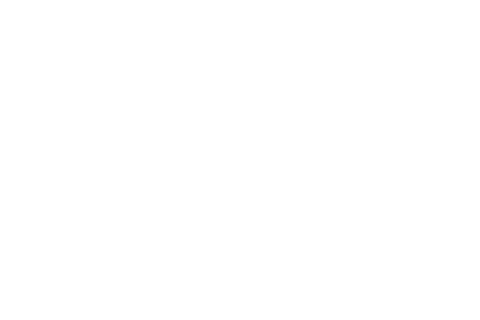

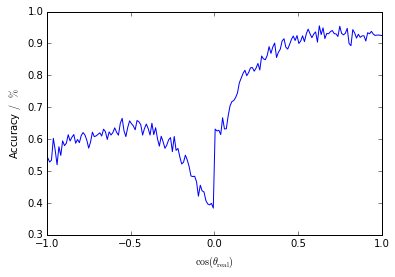

In [69]:
cosined = True
bins = 10*18+1
x_hist, y_hist = jkutils.get_xy_hist(zenith_out, res, bins, cosined)
plt.figure()
plt.plot(jkutils.get_plotted_x(x_hist, bins),y_hist)
if cosined:
    plt.xlabel(r'$\cos(\theta_{\mathrm{real}})$')
else:
    plt.xlabel(r'$\theta_{\mathrm{real}}$')
plt.ylabel(r'Accuracy $/\;\%$')
plt.show()

In [70]:
np.sum(np.round(np.cos(zenith[zenith<math.pi/2]))==np.round(np.cos(zenith_linefit[zenith<math.pi/2])))/float(len(zenith[zenith<math.pi/2]))

NameError: name 'zenith' is not defined

In [ ]:
reload(jkutils)

<IPython.core.display.Javascript object>


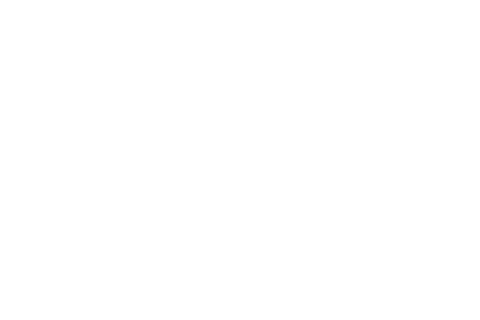

<IPython.core.display.Javascript object>


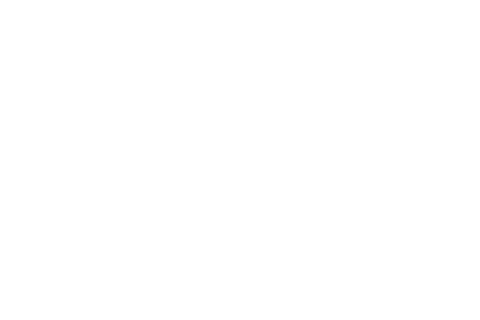

70.40%


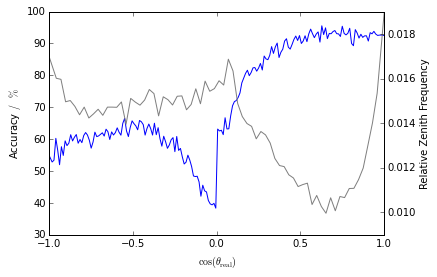

In [71]:
cosined = True
plt.figure()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
bins = 4*18+1
x_hist, y_zenith_hist = jkutils.get_xy_zenith_hist(zenith_out, bins, cosined)
ax2.plot(jkutils.get_plotted_x(x_hist,bins), y_zenith_hist, c="gray")
bins = 10*18+1
x_hist, y_hist = jkutils.get_xy_hist(zenith_out, res, bins, cosined=cosined)
ax1.plot(jkutils.get_plotted_x(x_hist,bins),100*y_hist)
ax1.set_xlabel(r'$\cos(\theta_{\mathrm{real}})$')
ax1.set_ylabel(r'Accuracy $/\;\%$')
ax2.set_ylabel(r'Relative Zenith Frequency')
plt.show()

In [56]:
y_zenith_hist

array([ 0.89586847,  0.84612142,  0.84359191,  0.79047218,  0.79342327,
        0.77951096,  0.75969646,  0.77782462,  0.75210793,  0.76180438,
        0.7727656 ,  0.7584317 ,  0.77782462,  0.77782462,  0.77740304,
        0.79005059,  0.73735245,  0.79848229,  0.78962901,  0.78246206,
        0.79468803,  0.81956155,  0.80986509,  0.75716695,  0.80227656,
        0.7955312 ,  0.78288364,  0.80354132,  0.80438449,  0.77150084,
        0.7841484 ,  0.82124789,  0.78583474,  0.83937605,  0.8153457 ,
        0.82166948,  0.84021922,  0.83010118,  0.89123103,  0.86340641,
        0.78667791,  0.75548061,  0.73903879,  0.73229342,  0.70278246,
        0.72006745,  0.71205734,  0.69266442,  0.65640809,  0.63954469,
        0.63701518,  0.61762226,  0.61003373,  0.58979764,  0.59443508,
        0.59780776,  0.54721754,  0.56871838,  0.5425801 ,  0.52655987,
        0.56323777,  0.53246206,  0.56618887,  0.56365936,  0.5851602 ,
        0.58558179,  0.60623946,  0.6336425 ,  0.68676223,  0.74

In [13]:
true_pos, true_neg = 0, 0
false_pos, false_neg = 0, 0
reals, preds = [], []
for pred, real in zip(res, test_out):
    if real == 1:
        if pred < 0.5:
            false_neg += 1
        else:
            true_pos += 1
    if real == 0:
        if pred > 0.5:
            false_pos += 1
        else:
            true_neg += 1
    reals.append(real)
    preds.append(pred)
print "         |    pos    |    neg    "
print "---------+-----------+-----------"
sum_all = true_pos + false_pos + true_neg + false_neg
if sum_all == 0:
    print "no data"
print "test pos |{:10.2f}%|{:10.2f}%".format(100 * true_pos / float(sum_all), 100 * false_pos / float(sum_all))
print "test neg |{:10.2f}%|{:10.2f}%".format(100 * false_neg / float(sum_all), 100 * true_neg / float(sum_all))


print "---------+-----------+-----------\n"*2,    
print "         |    pos    |    neg    "
print "---------+-----------+-----------" 
print "test pos |{:11.0f}|{:11.0f}".format(100 * true_pos, 100 * false_pos)
print "test neg |{:11.0f}|{:11.0f}".format(100 * false_neg, 100 * true_neg)

         |    pos    |    neg    
---------+-----------+-----------
test pos |      3.40%|      1.02%
test neg |     50.87%|     44.71%
---------+-----------+-----------
---------+-----------+-----------
         |    pos    |    neg    
---------+-----------+-----------
test pos |     877700|     262700
test neg |   13141900|   11550000


In [14]:
print "\n".join(map(str, zip(reals, preds))[:200])

(1.0, 0.14359115064144135)
(1.0, 0.45776617527008057)
(0.0, 0.045743729919195175)
(1.0, 0.10674998164176941)
(1.0, 0.085716038942337036)
(1.0, 0.26368814706802368)
(1.0, 0.18499447405338287)
(1.0, 0.041818242520093918)
(0.0, 0.055239066481590271)
(1.0, 0.065168149769306183)
(1.0, 0.11835683882236481)
(1.0, 0.0095294732600450516)
(0.0, 0.073607571423053741)
(1.0, 0.067196197807788849)
(1.0, 0.032700959593057632)
(0.0, 0.0057418993674218655)
(1.0, 0.051638927310705185)
(0.0, 0.031003944575786591)
(1.0, 0.041734214872121811)
(1.0, 0.041638877242803574)
(1.0, 0.082284733653068542)
(1.0, 0.063974373042583466)
(1.0, 0.097560234367847443)
(0.0, 0.042343094944953918)
(1.0, 0.10281994193792343)
(1.0, 0.028931623324751854)
(1.0, 0.051521439105272293)
(0.0, 0.094884902238845825)
(1.0, 0.056894086301326752)
(0.0, 0.1337469071149826)
(1.0, 0.041451908648014069)
(1.0, 0.08518422394990921)
(0.0, 0.098871342837810516)
(1.0, 0.0097090080380439758)
(0.0, 0.17490124702453613)
(0.0, 0.08031221479177475)
(

## accuracy evolution over epochs

In [40]:
file_location = '/data/user/jkager/NN_Reco/johannes/updownclassification_3/'
data_location = '/data/user/jkager/NN_Reco/training_data_20x10x60/'
projects = 'train_hist/'
startfrom = '2017-09-07'
to = '2017-09-13'

losses = {}
test_acc = {}

if not os.path.exists(os.path.join(file_location,projects)):
    print "project not found. exiting..."
    sys.exit(-1)
for path, subdirs, files in os.walk(os.path.join(file_location,projects)):
    if path < os.path.join(file_location, projects, startfrom) or \
       path >= os.path.join(file_location, projects, to):
        continue
    if 'loss_logger.csv' in files:
        pname = '_'.join(path.replace('-','_').split('/')[-2:])
    for name in files:
        if name == 'loss_logger.csv':
            f = open(os.path.join(path, name))
            f.readline()
            ls = []
            for l in f:
                ls.append(map(float, l.split(',')))
            losses[pname] = np.array(ls)[:,1:]
        elif name == 'condor.out':
            f = open(os.path.join(path, name))
            try:
                test_acc[pname] = float(f.readlines()[-3].replace('%','').split(' ')[-1])/100
            except:
                test_acc[pname] = None
        elif name == 'condor.log':
            if 'Normal termination' not in open(os.path.join(path, name)).read():
                losses.pop(pname, None)
                test_acc.pop(pname, None)
                break

In [35]:
loss = losses.items()[5]
print loss

('2017_09_07_time_high_v2_lb', array([[ 0.83539881,  0.3916864 ,  0.865771  ,  0.307328  ],
       [ 0.88208699,  0.27358525,  0.914524  ,  0.201892  ],
       [ 0.90433144,  0.22655272,  0.922835  ,  0.18947   ],
       [ 0.91272716,  0.20827488,  0.929466  ,  0.174364  ],
       [ 0.91798142,  0.19557973,  0.933122  ,  0.163398  ],
       [ 0.92246644,  0.18643615,  0.935496  ,  0.158204  ],
       [ 0.92522845,  0.17933022,  0.938009  ,  0.155     ],
       [ 0.92867063,  0.17299099,  0.938691  ,  0.152449  ],
       [ 0.93031879,  0.1678041 ,  0.938308  ,  0.154105  ],
       [ 0.93273748,  0.16328259,  0.939864  ,  0.149654  ],
       [ 0.93490836,  0.15873946,  0.941681  ,  0.145956  ],
       [ 0.93628678,  0.15593577,  0.940236  ,  0.148003  ],
       [ 0.93757873,  0.15263656,  0.94019   ,  0.150364  ],
       [ 0.93895328,  0.14973583,  0.940852  ,  0.147146  ],
       [ 0.94017036,  0.1467215 ,  0.936875  ,  0.157998  ],
       [ 0.94122483,  0.14423279,  0.94318   ,  0.1425

2017_09_07_time_h012_v1_lowbatch 93.04


<IPython.core.display.Javascript object>


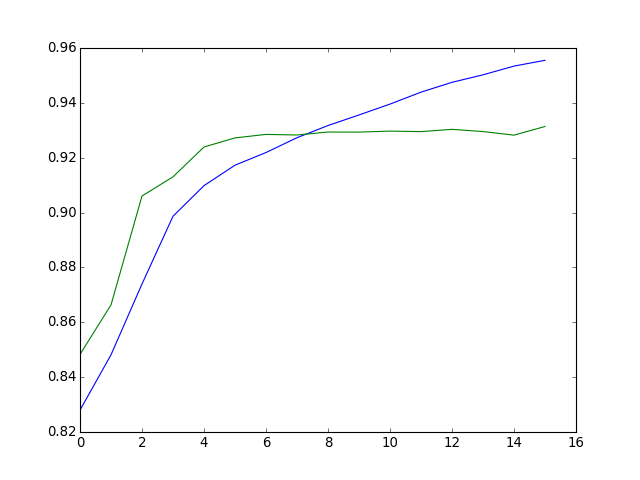

2017_09_07_time_high_v1_lb 94.00


<IPython.core.display.Javascript object>


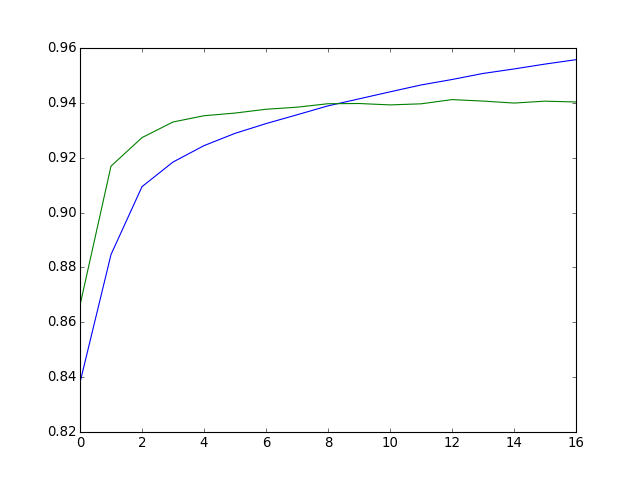

2017_09_07_time_high_v2_lb 94.56


<IPython.core.display.Javascript object>


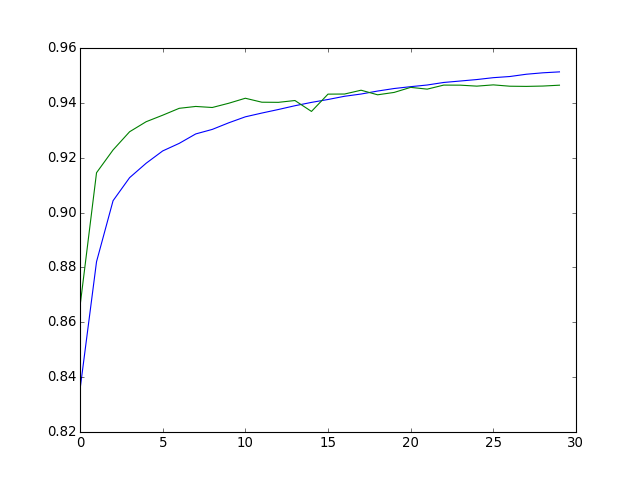

2017_09_08_time_h012_v1_time_1 92.78


<IPython.core.display.Javascript object>


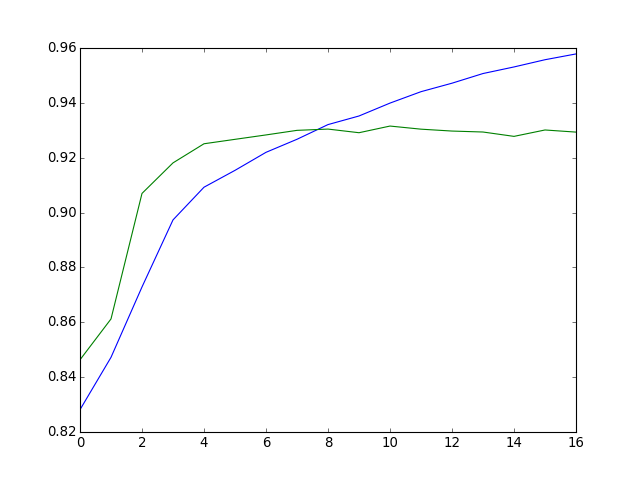

2017_09_08_time_h012_vmini 84.93


<IPython.core.display.Javascript object>


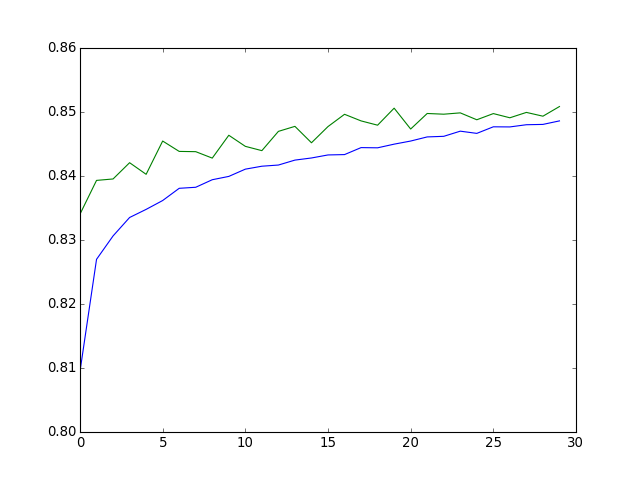

2017_09_09_time_h012_v1do_time_1 93.73


<IPython.core.display.Javascript object>


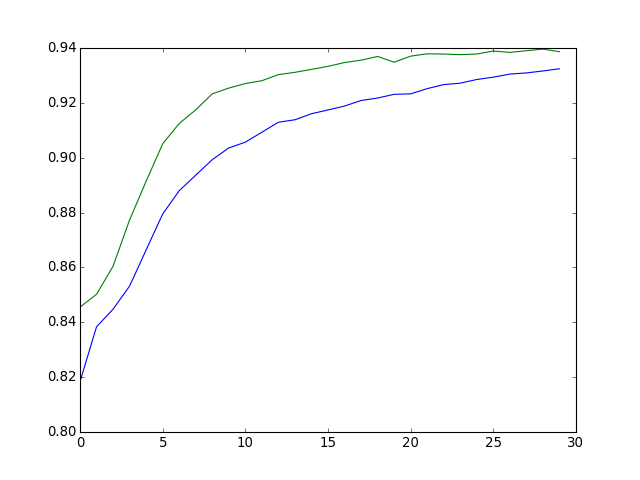

2017_09_11_time_h012_v1_nobnorm 54.07


<IPython.core.display.Javascript object>


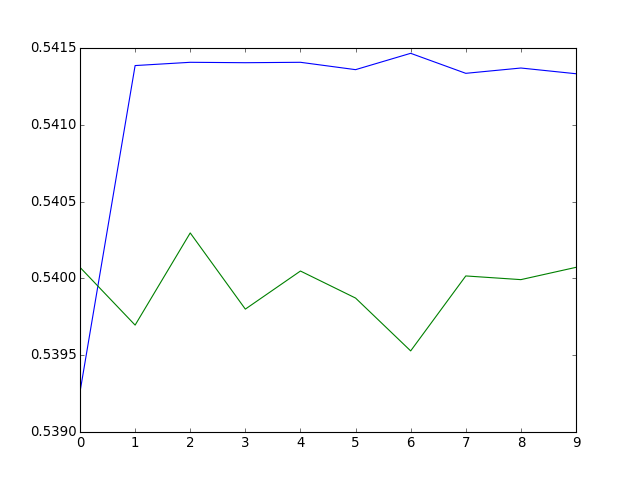

2017_09_12_charge_h012_fcnn_norm 64.21


<IPython.core.display.Javascript object>


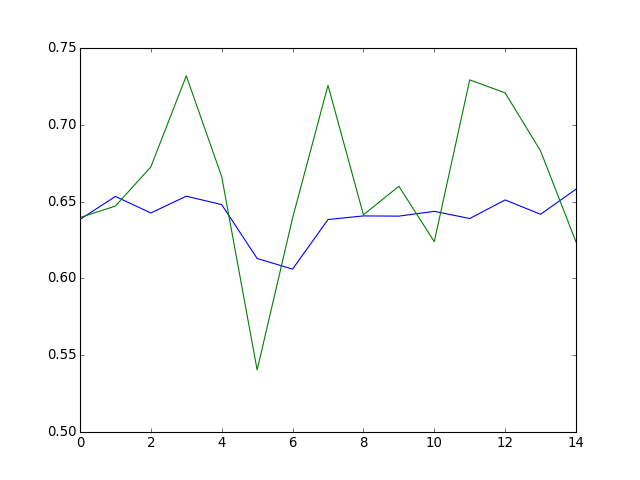

2017_09_12_time_h012_fcnn 54.07


<IPython.core.display.Javascript object>


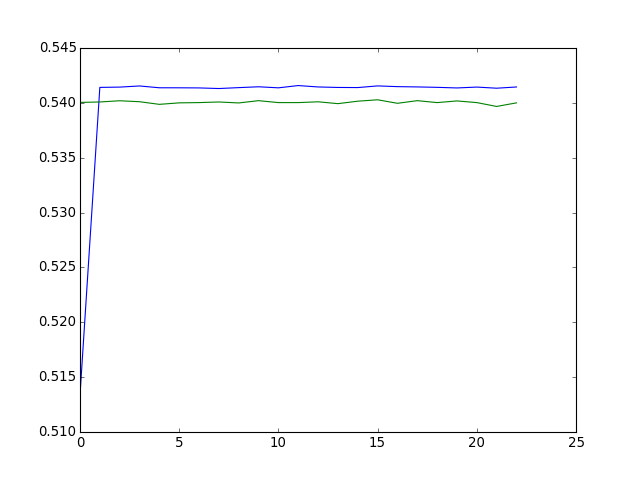

2017_09_12_time_h012_fcnn_t0 48.20


<IPython.core.display.Javascript object>


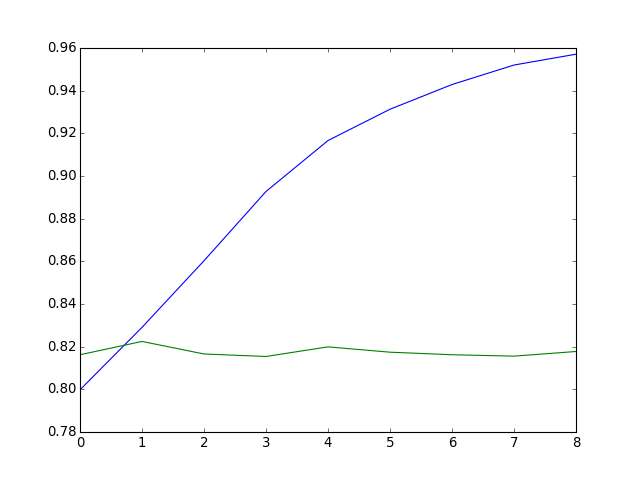

2017_09_12_time_h012_v1_nobnorm 54.07


<IPython.core.display.Javascript object>


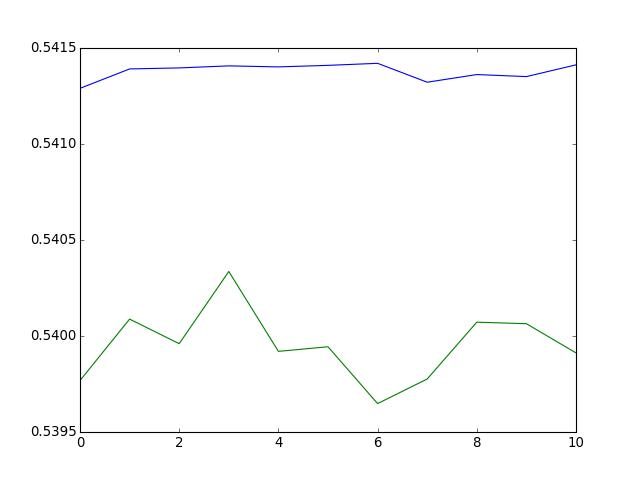

2017_09_12_time_h012_v1_onebnorm 47.94


<IPython.core.display.Javascript object>


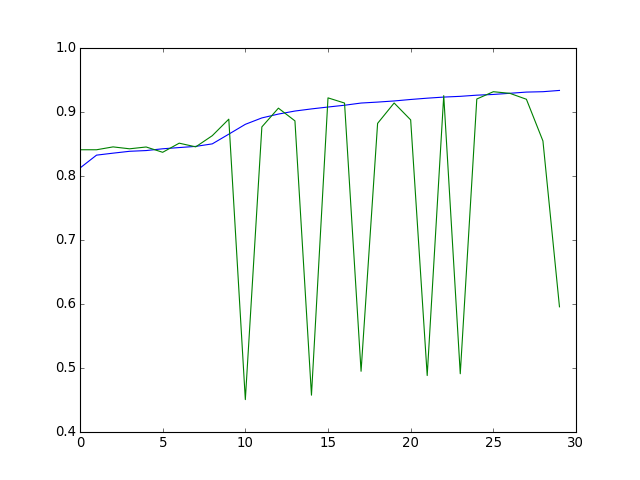

2017_09_12_time_high_fcnn_t0 48.11


<IPython.core.display.Javascript object>


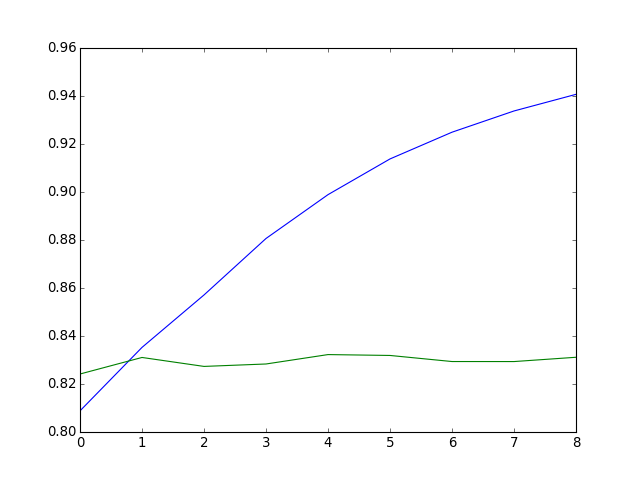

In [42]:
for k, ls in sorted(losses.items()):
    print k, '{:.2f}'.format(100*test_acc[k])
    plt.figure()
    plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
    plt.plot(ls[:,0])
    plt.plot(ls[:,2])

## accuracy over number of hit bins

In [7]:
def num_hit_bins(input_set):
    ret = 0
    for j in input_set.flatten():
        if shelf['using'] == 'time' and j != np.inf:
            ret += 1
        if shelf['using'] == 'charge' and j > 0.0:
            ret += 1
    return ret

In [8]:
def get_pos_in_res(i_file, i_in_testsets):
    before = sum([test_inds[i][1] - test_inds[i][0] for i in range(i_file)])
    return before + i_in_testsets

In [47]:
#use savefile!
sys.exit()
bins = 100
input_shape = input_data[0].shape[1:-1]
x_bins = np.linspace(0,reduce(lambda x, y: x*y, input_shape),bins)
y_acc_data = [[] for i in range(bins-1)]
cor, summe = 0, 0
for file_n in range(len(input_data)):
    print "file", file_n
    for i, inp_s in enumerate(input_data[file_n][test_inds[file_n][0]:test_inds[file_n][1]]):
        n_hit = num_hit_bins(inp_s)
        if n_hit == x_bins[-1]:
            bin_n = bins - 2
        else:
            bin_n = np.digitize(np.array([n_hit]), x_bins)[0] - 1
        #remember if it was correctly reconstructed
        index = get_pos_in_res(file_n, i)
        print index
        correct = np.round(res[index]) == jkutils.zenith_to_binary(zenith_out[index]) #latter is same as test_out
        y_acc_data[bin_n].append(correct)
y_acc = [float(sum(i))/len(i) if len(i) > 0 else None for i in y_acc_data]

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [48]:
#use already calculated results
nhits = np.array(np.load("save_ndoms_h012_testsets.npy"),dtype=np.int)

In [49]:
nhits

array([225, 428, 649, ...,  89, 432,  82])

In [50]:
#print nhits over energy
x=np.array([])
y=np.array([])
for file_n in range(len(input_data)):
    print "file", file_n
    x = np.concatenate((x, np.log10(out_data[file_n][test_inds[file_n][0]:test_inds[file_n][1]:1,"energy"])))
    y = np.concatenate((y, nhits[np.arange(get_pos_in_res(file_n,0),get_pos_in_res(file_n+1,0))[::1]]))

file 0
file 1
file 2


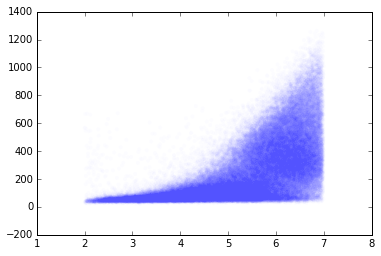

In [51]:
plt.figure()
plt.scatter(x,y,alpha=0.01,edgecolor='none')

In [52]:
bins = 100
input_shape = input_data[0].shape[1:-1]
#x_bins = np.linspace(0,reduce(lambda x, y: x*y, input_shape),bins)
x_bins = np.linspace(0,500,bins)
y_acc_data = [[] for i in range(bins-1)]
cor, summe = 0, 0
for i, n_hit in enumerate(nhits):
    if n_hit > x_bins[-1]:
        continue
    if n_hit == x_bins[-1]:
        bin_n = bins - 2
    else:
        bin_n = np.digitize(np.array([n_hit]), x_bins)[0] - 1
    #remember if it was correctly reconstructed
    index = i
    correct = np.round(res[index]) == jkutils.zenith_to_binary(zenith_out[index]) #latter is same as test_out
    y_acc_data[bin_n].append(correct)
y_acc = [float(sum(i))/len(i) if len(i) > 0 else None for i in y_acc_data]

In [55]:
print '\n'.join(["{:9.2f}  {:.3f} {:5d}".format(c,a,b) for c,a,b in zip(x_bins[:-1], y_acc_zero, [len(i) for i in y_acc_data])])

     0.00  0.000     0
     5.05  0.000     0
    10.10  0.000     0
    15.15  0.000     0
    20.20  1.000    10
    25.25  0.981   106
    30.30  0.979   520
    35.35  0.971  1494
    40.40  0.960  2644
    45.45  0.948  3635
    50.51  0.934  4135
    55.56  0.933  4278
    60.61  0.926  3958
    65.66  0.909  3666
    70.71  0.911  3213
    75.76  0.889  2839
    80.81  0.884  2569
    85.86  0.896  2344
    90.91  0.879  2201
    95.96  0.866  2350
   101.01  0.864  1891
   106.06  0.852  1830
   111.11  0.869  1630
   116.16  0.868  1533
   121.21  0.885  1439
   126.26  0.878  1359
   131.31  0.882  1331
   136.36  0.882  1285
   141.41  0.889  1218
   146.46  0.877  1162
   151.52  0.887  1165
   156.57  0.871  1100
   161.62  0.876  1055
   166.67  0.877  1008
   171.72  0.880   999
   176.77  0.877   963
   181.82  0.904   857
   186.87  0.906   883
   191.92  0.878   876
   196.97  0.895  1053
   202.02  0.898   813
   207.07  0.899   851
   212.12  0.918   806
   217.17  

In [68]:
y_acc_zero = np.array([i if i is not None else 0.0 for i in y_acc])

188.0789932421138

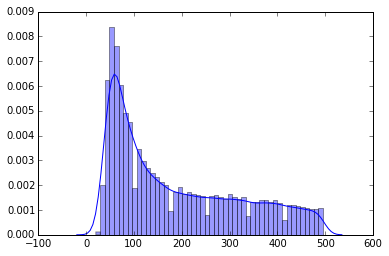

In [65]:
from functools import reduce
distp = []
for i, n in enumerate(len(k) for k in y_acc_data):
    distp += n*[i]
sns.distplot([x_bins[i] for i in distp])
np.mean(x_bins[[distp]])

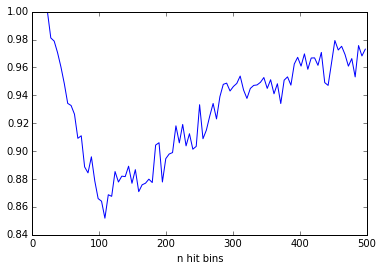

In [69]:
plt.figure()
plotbins=x_bins[:-1]+float(x_bins[-1]-x_bins[0])/(len(x_bins)-1)/2
plt.plot(np.array(plotbins)[y_acc_zero>0], y_acc_zero[y_acc_zero>0])
plt.xlabel('n hit bins')
plt.show()

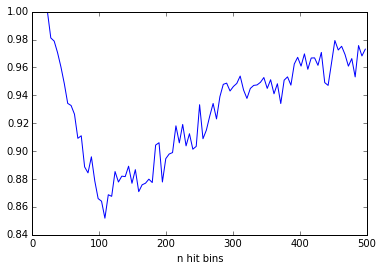

In [67]:
plt.figure()
plotbins=x_bins[:-1]+float(x_bins[-1]-x_bins[0])/(len(x_bins)-1)/2
plt.plot(np.array(plotbins)[y_acc_zero>0], y_acc_zero[y_acc_zero>0])
plt.xlabel('n hit bins')
plt.show()

In [72]:
filt=nhits<35

In [73]:
np.sum(filt)

469

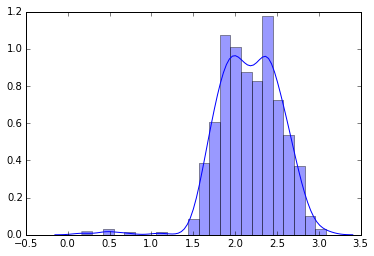

In [74]:
sns.distplot(zenith_out[filt])

In [26]:
input_data[0][0].flatten()[0] == np.inf

True

In [35]:
x_bins

array([     0.        ,    121.21212121,    242.42424242,    363.63636364,
          484.84848485,    606.06060606,    727.27272727,    848.48484848,
          969.6969697 ,   1090.90909091,   1212.12121212,   1333.33333333,
         1454.54545455,   1575.75757576,   1696.96969697,   1818.18181818,
         1939.39393939,   2060.60606061,   2181.81818182,   2303.03030303,
         2424.24242424,   2545.45454545,   2666.66666667,   2787.87878788,
         2909.09090909,   3030.3030303 ,   3151.51515152,   3272.72727273,
         3393.93939394,   3515.15151515,   3636.36363636,   3757.57575758,
         3878.78787879,   4000.        ,   4121.21212121,   4242.42424242,
         4363.63636364,   4484.84848485,   4606.06060606,   4727.27272727,
         4848.48484848,   4969.6969697 ,   5090.90909091,   5212.12121212,
         5333.33333333,   5454.54545455,   5575.75757576,   5696.96969697,
         5818.18181818,   5939.39393939,   6060.60606061,   6181.81818182,
         6303.03030303,  

## other network

In [6]:
today='2017-09-12'
project_name='time_high_fcnn_t0'

In [10]:
file_location = '/data/user/jkager/NN_Reco/johannes/updownclassification_3/'
data_location = '/data/user/jkager/NN_Reco/training_data_20x10x60/'
test_results = 'test_results.npy'

project_folder = 'train_hist/{}/{}'.format(today, project_name)
print "looking for", project_folder
if not os.path.exists(os.path.join(file_location,project_folder)):
    print "project not found. exiting..."
    sys.exit(-1)
elif not os.path.exists(os.path.join(file_location, project_folder, test_results)):
    print "test results not found. exiting..."
    sys.exit(-1)
print "found"
shelf = shelve.open(os.path.join(file_location, project_folder, 'run_info.shlf'))
input_files = shelf['Files'].split(':')
if len(input_files) == 1: #this could be something like ['h01'] (inputformat)
    #try to decode fileinput format
    input_files = jkutils.get_filenames(input_files[0])
    for f in input_files:
        if not os.path.isfile(os.path.join(data_location, 'training_data/{}'.format(f))):
            print "file not found:", f
            print "exiting script."
            sys.exit(1)
train_inds = shelf['Train_Inds'] 
valid_inds = shelf['Valid_Inds']
test_inds = shelf['Test_Inds']
test_results = np.load(os.path.join(file_location, project_folder, test_results))
input_data, out_data, file_len = jkutils.read_files(input_files, data_location, using=shelf['using'])
res, test_out, zenith_out = test_results[0,:], test_results[1,:], test_results[2,:] #network output (0 or 1), 
                                                                                    #desired output (0 or 1),
                                                                                    #zenith (0 to pi)

looking for train_hist/2017-09-12/time_high_fcnn_t0
found


48.11%


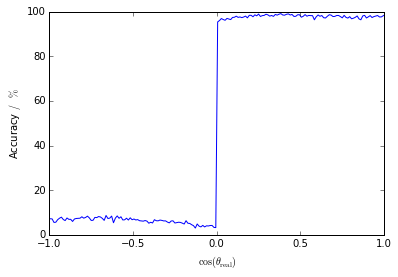

In [12]:
cosined = True
bins = 10*18+1
x_hist, y_hist = jkutils.get_xy_hist(zenith_out, res, bins, cosined)
plt.figure()
plt.plot(jkutils.get_plotted_x(x_hist, bins),100*y_hist)
plt.xlabel(r'$\cos(\theta_{\mathrm{real}})$')
plt.ylabel(r'Accuracy $/\;\%$')
plt.show()

92.74%


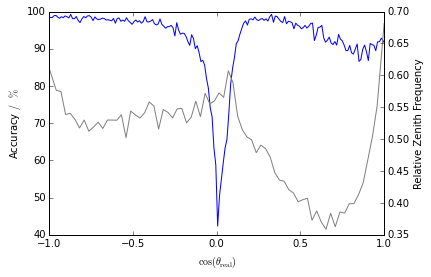

In [15]:
cosined = True
plt.figure()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
bins = 4*18+1
x_hist, y_zenith_hist = jkutils.get_xy_zenith_hist(zenith_out, bins, cosined)
ax2.plot(jkutils.get_plotted_x(x_hist,bins), y_zenith_hist, c="gray")
bins = 10*18+1
x_hist, y_hist = jkutils.get_xy_hist(zenith_out, res, bins, cosined=cosined)
ax1.plot(jkutils.get_plotted_x(x_hist,bins),100*y_hist)
ax1.set_xlabel(r'$\cos(\theta_{\mathrm{real}})$')
ax1.set_ylabel(r'Accuracy $/\;\%$')
ax2.set_ylabel(r'Relative Zenith Frequency')
plt.show()